In [1]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

2023-02-27 11:03:56.035870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_III dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/"
    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
0
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
1
(20000, 2048)
(20000,)
[0.0234375+0.j        0.0234375+0.0234375j 0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
79732
(2048, 79732)
[0.01835802 0.00962685 0.00344502 ... 0.00159603 0.00344605 0.00971396]
2
(30000, 2048)
(30000,)
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.015625j  ...
 0.       -0.0078125j 0.015625 -0.0078125j 0.03125  +0.0078125j]
2048
72926
(2048, 72926)
[0.01814387 0.00948817 0.00355478 ... 0.00184933 0.0035476  0.0094812 ]
3
(40

## Cross-model Validation

## iPhone13_I model

Cross-model Validation without training

In [4]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_model.h5")
model.summary()

2023-02-27 11:13:52.156005: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [5]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 19.7069 - accuracy: 0.1927
test loss, test acc: [19.70686912536621, 0.19267000257968903]


In [6]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[10000     0     0     0     0     0     0     0     0     0]
 [ 9999     0     0     0     0     0     1     0     0     0]
 [ 9984     0     0     0     0     0    16     0     0     0]
 [ 9996     0     0     0     0     0     4     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [ 3596     6   340     0     0     0  6058     0     0     0]
 [  826     1     0     0     0     0  9173     0     0     0]
 [   51   699    43     0     0     0  9207     0     0     0]
 [   31  8741    91     0     0     5  1038     0    94     0]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.16      1.00      0.27     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.19267


Text(0.5, 1.0, 'Accuracy:0.193')

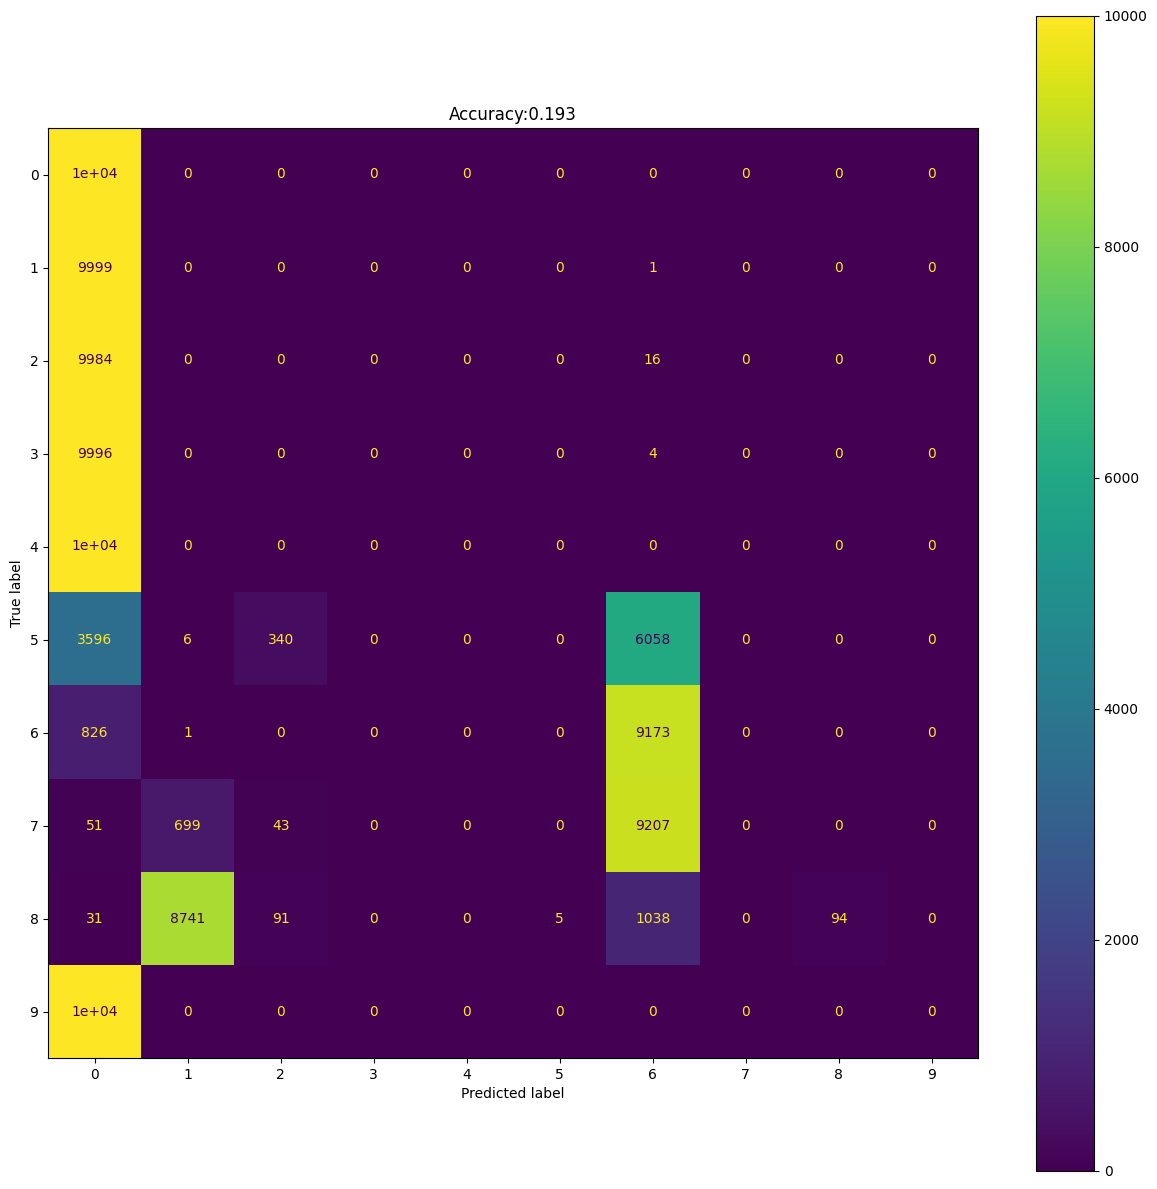

In [7]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [8]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_19 (Dense)            (None, 800)               1120800   
                                                                 
 dense_20 (Dense)            (None, 500)               400500    
                                                                 
 dense_21 (Dense)            (None, 200)               100200    
                                                                 
 dense_22 (Dense)            (None, 100)               20100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [9]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.7833 - accuracy: 0.3760
Epoch 2/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2225 - accuracy: 0.5361
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.0996 - accuracy: 0.6004
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0287 - accuracy: 0.6302
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9794 - accuracy: 0.6476
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9420 - accuracy: 0.6613
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9121 - accuracy: 0.6701
Epoch 8/30
3125/3125 [==============================] - 14s 5ms/step - loss: 0.8871 - accuracy: 0.6801
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8664 - accuracy: 0.6863
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

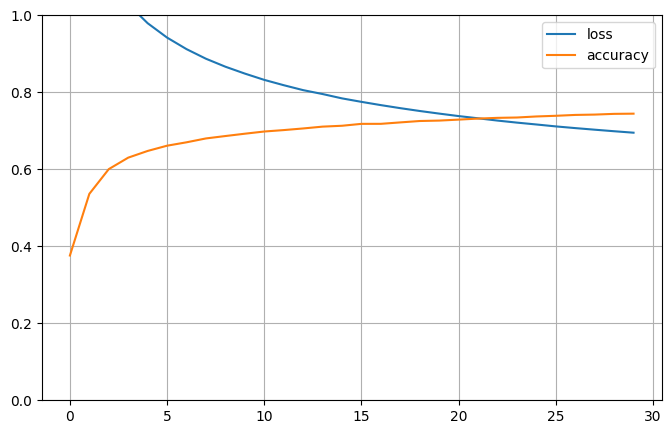

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [11]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 12s 4ms/step - loss: 0.6927 - accuracy: 0.7409
test loss, test acc: [0.692683756351471, 0.7408999800682068]


In [12]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[8626 1020   91   16   10    0    0    0    0  237]
 [ 627 8846   78   33    8    0    1    0    0  407]
 [ 151  140 6753 1745  359    2  108    0    0  742]
 [ 227  345 3110 4473  603    0   32    0    0 1210]
 [ 365  460 1080 1078 1825    0    0    0    0 5192]
 [   0    0   40    4    1 8993  384  561   12    5]
 [   9   13   56    2    0  456 9044  411    5    4]
 [   0    0    0    0    0  892  600 8003  505    0]
 [  22    0    1    0    0   43   11  491 9429    3]
 [ 191  623  366  384  338    0    0    0    0 8098]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     10000
           1       0.77      0.88      0.82     10000
           2       0.58      0.68      0.63     10000
           3       0.58      0.45      0.50     10000
           4       0.58      0.18      0.28     10000
           5       0.87      0.90      0.88     10000
           6       0.89      0.9

Test Accuracy:0.7409


Text(0.5, 1.0, 'Accuracy:0.741')

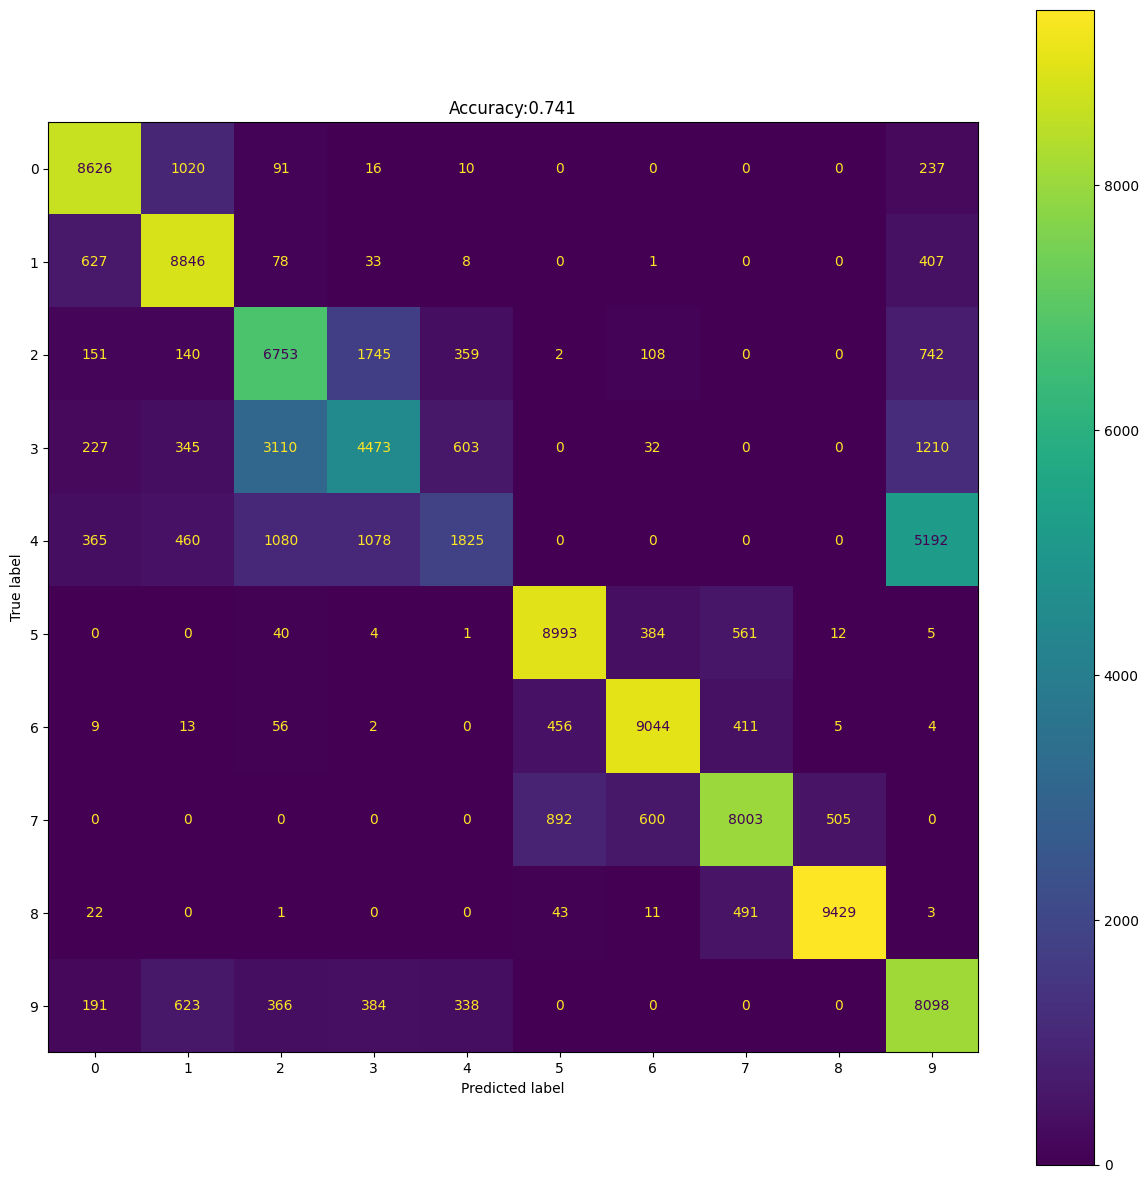

In [13]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(ii) model

Cross-model Validation without training

In [14]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(ii)_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [15]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 17s 5ms/step - loss: 15.7728 - accuracy: 0.1179
test loss, test acc: [15.772764205932617, 0.11789000034332275]


In [16]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[   0    1    0 1858  281    0    0 7447    0  413]
 [   0    0    0 9731   18    0    0  251    0    0]
 [   0   11    0 9055  798    0    0   57    0   79]
 [   0    3    0 9528  416    0    0   32    0   21]
 [   0    7    0 5805 2154    0    0 1839    0  195]
 [   0    3    0  718 9246    0    0    0    0   33]
 [   0  643    0 8936  415    0    0    3    0    3]
 [   0   46    0 9613  341    0    0    0    0    0]
 [   0 3512    4 3889 2566    0    0   10    0   19]
 [   0    3    0 5333 1621    0    0 2936    0  107]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.15      0.95      0.26     10000
           4       0.12      0.22      0.15     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.11789


Text(0.5, 1.0, 'Accuracy:0.118')

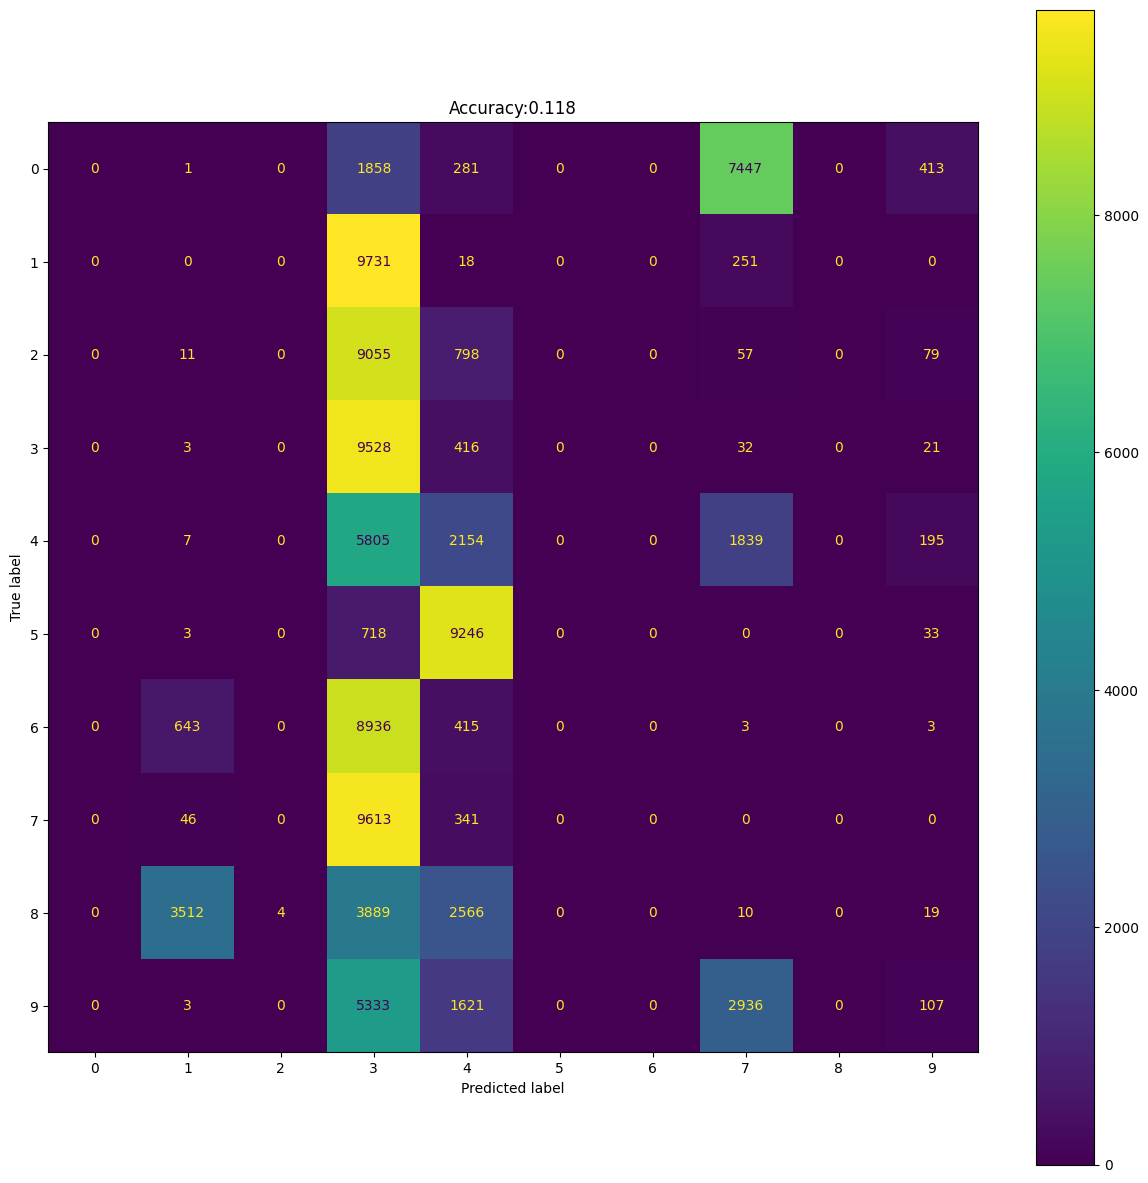

In [17]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [18]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 14s 4ms/step - loss: 2.1634 - accuracy: 0.3652
Epoch 2/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1495 - accuracy: 0.5933
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9974 - accuracy: 0.6539
Epoch 4/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9206 - accuracy: 0.6810
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.8711 - accuracy: 0.6972
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8357 - accuracy: 0.7071
Epoch 7/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.8080 - accuracy: 0.7166
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7857 - accuracy: 0.7215
Epoch 9/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7665 - accuracy: 0.7277
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

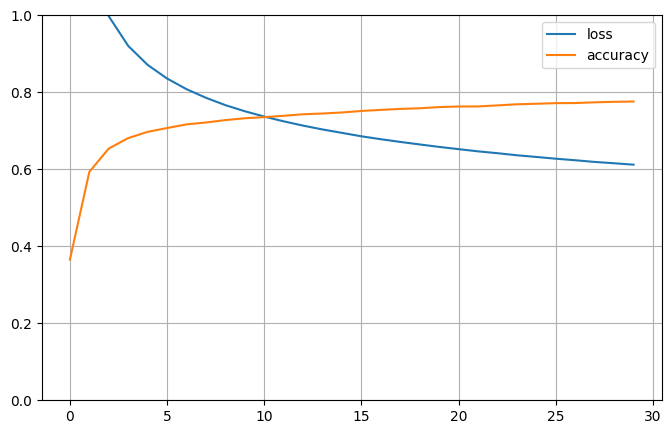

In [20]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [21]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.6110 - accuracy: 0.7743
test loss, test acc: [0.611047625541687, 0.7742699980735779]


In [22]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9141  517  106    2  128    0    1    0    0  105]
 [ 327 9574   45    7   12    0    1    1    0   33]
 [  86  153 6756 1506 1300   22  123   26    0   28]
 [  18  301 3522 4360 1497   24  105   90    0   83]
 [ 327  170  815  628 6790    5   12    1    0 1252]
 [   0    0   90   14    2 9781   30   78    4    1]
 [  16    7   83    1    0   98 9037  720   38    0]
 [   0    0   24   23    1  171 1403 8149  229    0]
 [  25    0    1    1    0   24  104  343 9502    0]
 [ 483  287  373  403 4106    0    8    3    0 4337]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     10000
           1       0.87      0.96      0.91     10000
           2       0.57      0.68      0.62     10000
           3       0.63      0.44      0.51     10000
           4       0.49      0.68      0.57     10000
           5       0.97      0.98      0.97     10000
           6       0.83      0.9

Test Accuracy:0.77427


Text(0.5, 1.0, 'Accuracy:0.774')

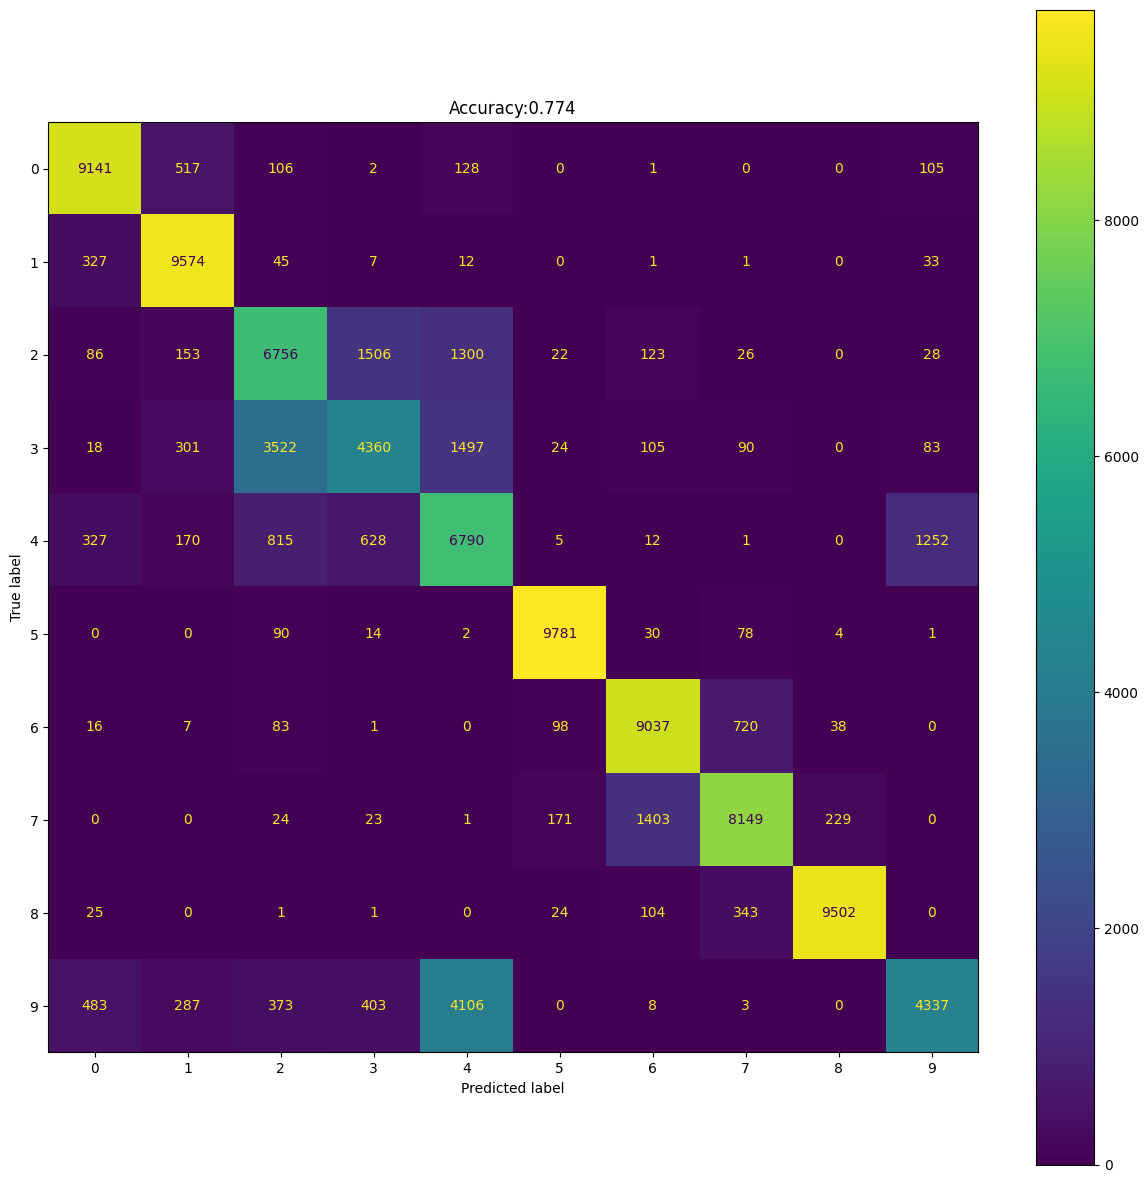

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I(iii) model

Cross-model Validation without training

In [24]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I(iii)_model.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [25]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 15.0952 - accuracy: 0.1041
test loss, test acc: [15.095242500305176, 0.1041100025177002]


In [26]:
y_pred = np.argmax(model.predict(X), axis=-1)


print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[   0    0  139 9545    0    0    0    0    0  316]
 [   0    0   77 9918    0    0    0    0    0    5]
 [   0    0 1139 8861    0    0    0    0    0    0]
 [   0    0  726 9272    0    0    0    0    0    2]
 [   0    0   48 9951    0    0    0    0    0    1]
 [   0    0  270 9730    0    0    0    0    0    0]
 [   0    0  473 9526    0    0    0    0    0    1]
 [   0    0 2354 7646    0    0    0    0    0    0]
 [   0    0 2747 7253    0    0    0    0    0    0]
 [   0    0   89 9911    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.14      0.11      0.13     10000
           3       0.10      0.93      0.18     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.10411


Text(0.5, 1.0, 'Accuracy:0.104')

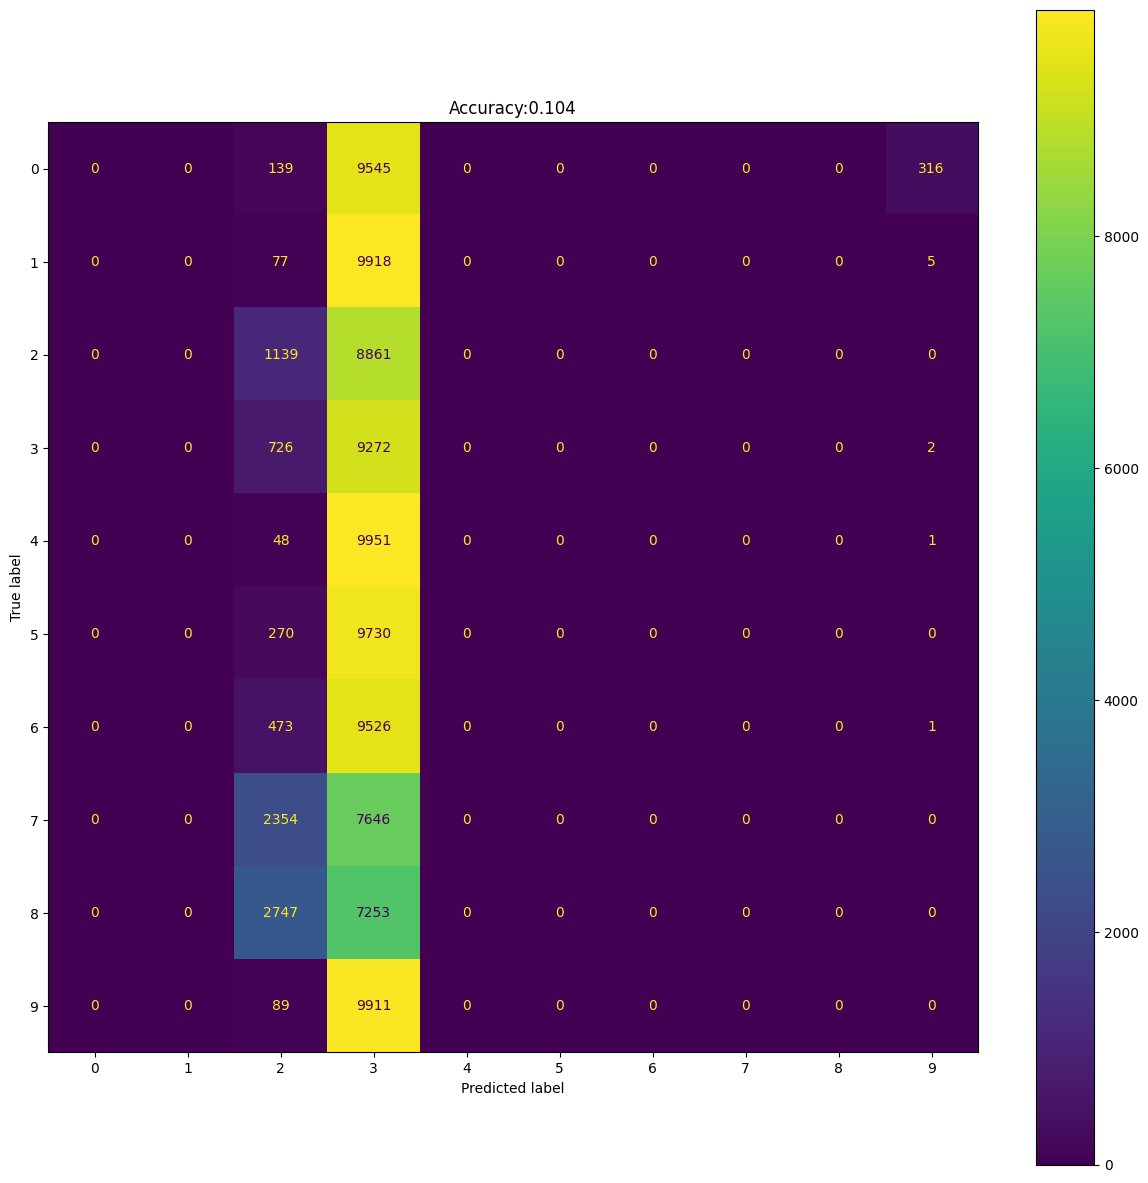

In [27]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [28]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_13 (Dense)            (None, 800)               1120800   
                                                                 
 dense_14 (Dense)            (None, 500)               400500    
                                                                 
 dense_15 (Dense)            (None, 200)               100200    
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [29]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 2.5033 - accuracy: 0.2071
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.6499 - accuracy: 0.3794
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4934 - accuracy: 0.4375
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.4081 - accuracy: 0.4795
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3494 - accuracy: 0.5096
Epoch 6/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.3057 - accuracy: 0.5306
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2707 - accuracy: 0.5492
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.2416 - accuracy: 0.5625
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2169 - accuracy: 0.5724
Epoch 10/30
3125/3125 [==============================] - 12s 4ms/step - l

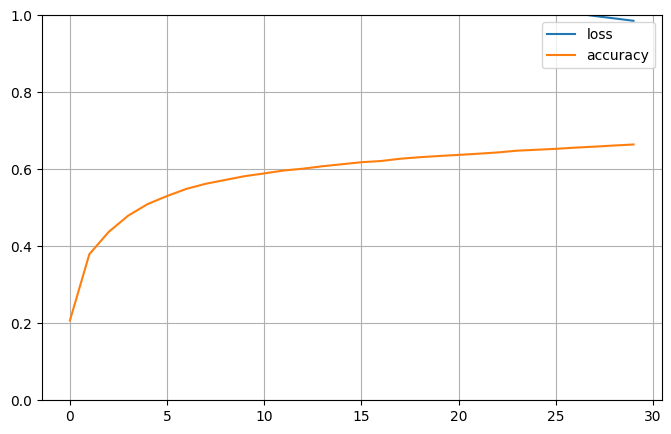

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [31]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 5ms/step - loss: 0.9896 - accuracy: 0.6533
test loss, test acc: [0.9895578026771545, 0.6532899737358093]


In [32]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 12s 4ms/step
[[9367  561   10   40   17    0    0    0    0    5]
 [ 937 7649  130  841  168    0    3    0    0  272]
 [  59  604 2748 4807  251  103   55  220    0 1153]
 [  25  344  468 7185  522  179   41  328    1  907]
 [  44  385  138 2291 3591  250   67   48    0 3186]
 [   3   12   63  514  107 6324 1254  981  410  332]
 [  12   57   38  270   44  686 7745  812  258   78]
 [   0    0   34  441    3  757  519 7228 1014    4]
 [  11   17    1    7    1  491  567 1352 7552    1]
 [  25  369  204 1783 1305  298   45   31    0 5940]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10000
           1       0.77      0.76      0.76     10000
           2       0.72      0.27      0.40     10000
           3       0.40      0.72      0.51     10000
           4       0.60      0.36      0.45     10000
           5       0.70      0.63      0.66     10000
           6       0.75      0.7

Test Accuracy:0.65329


Text(0.5, 1.0, 'Accuracy:0.653')

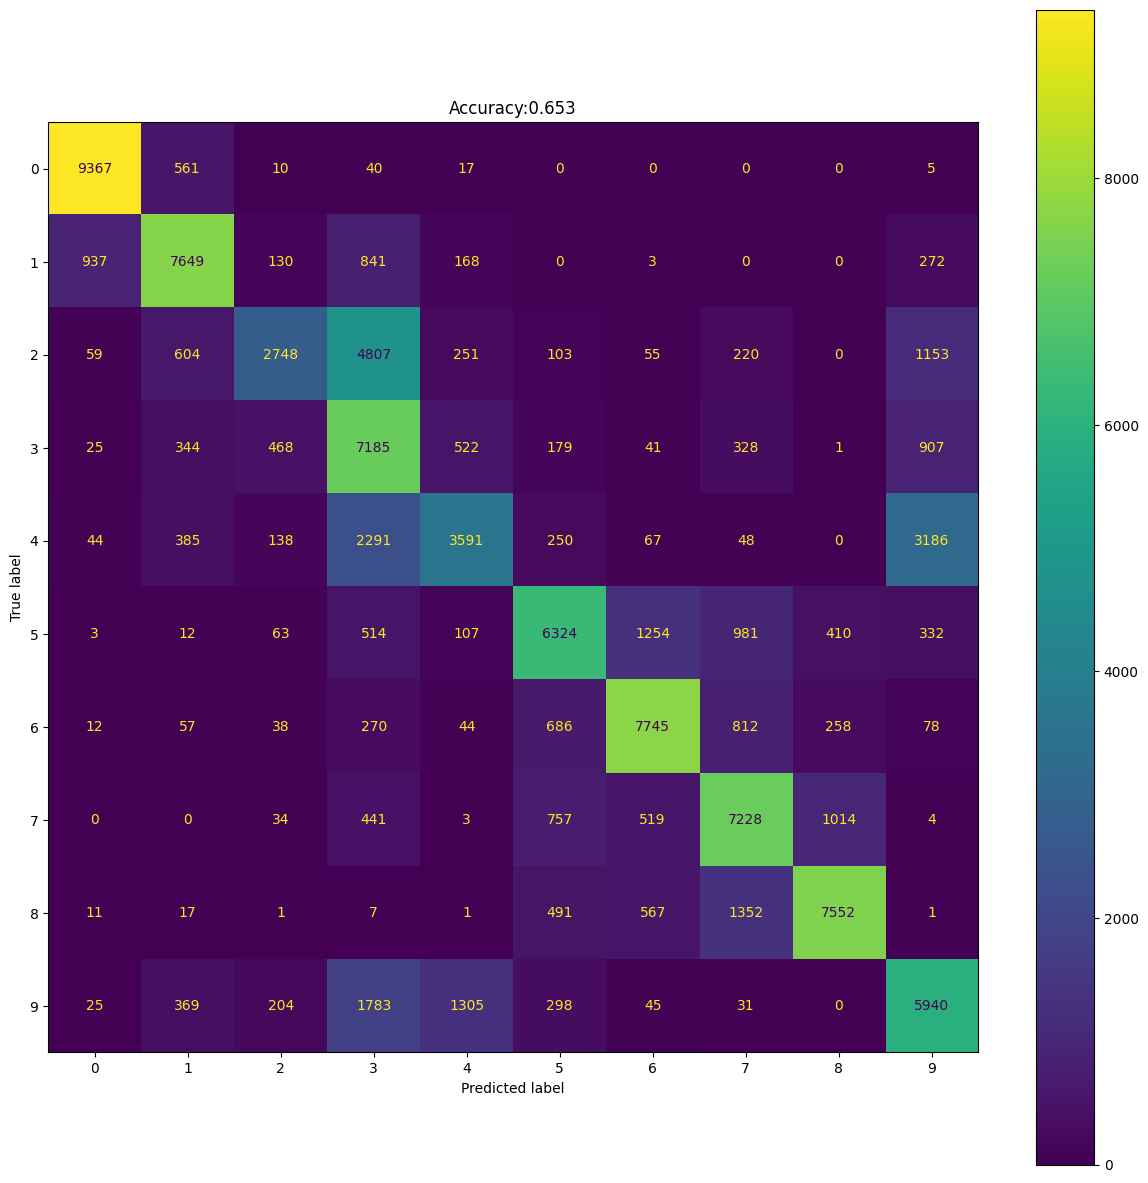

In [33]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_BeSh model

Cross-model Validation without training

In [34]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_BeSh_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [35]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 32.5977 - accuracy: 0.0884
test loss, test acc: [32.59769821166992, 0.08842000365257263]


In [36]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 5ms/step
[[   0    4    0    0    0 9892    0    0  104    0]
 [   0    0    0    0    0 9983    0    0   17    0]
 [   0    8    0    0    0 6681    0    0 3311    0]
 [   0    0    0    0    0 6781    0    0 3219    0]
 [   0    0    0    0    0 9970    0    0   30    0]
 [   0  140    0    0    0    2 9634    0  224    0]
 [   0  556    0    0    0    8 8839    0  597    0]
 [   0 5316    0    0    1    0 4537    0  146    0]
 [   0 9954    0    0   25    2   18    0    1    0]
 [   0    0    0    0    0 9976    0    0   24    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.00      0.00      0.00     10000
           6       0.38      0.8

Test Accuracy:0.08842


Text(0.5, 1.0, 'Accuracy:0.088')

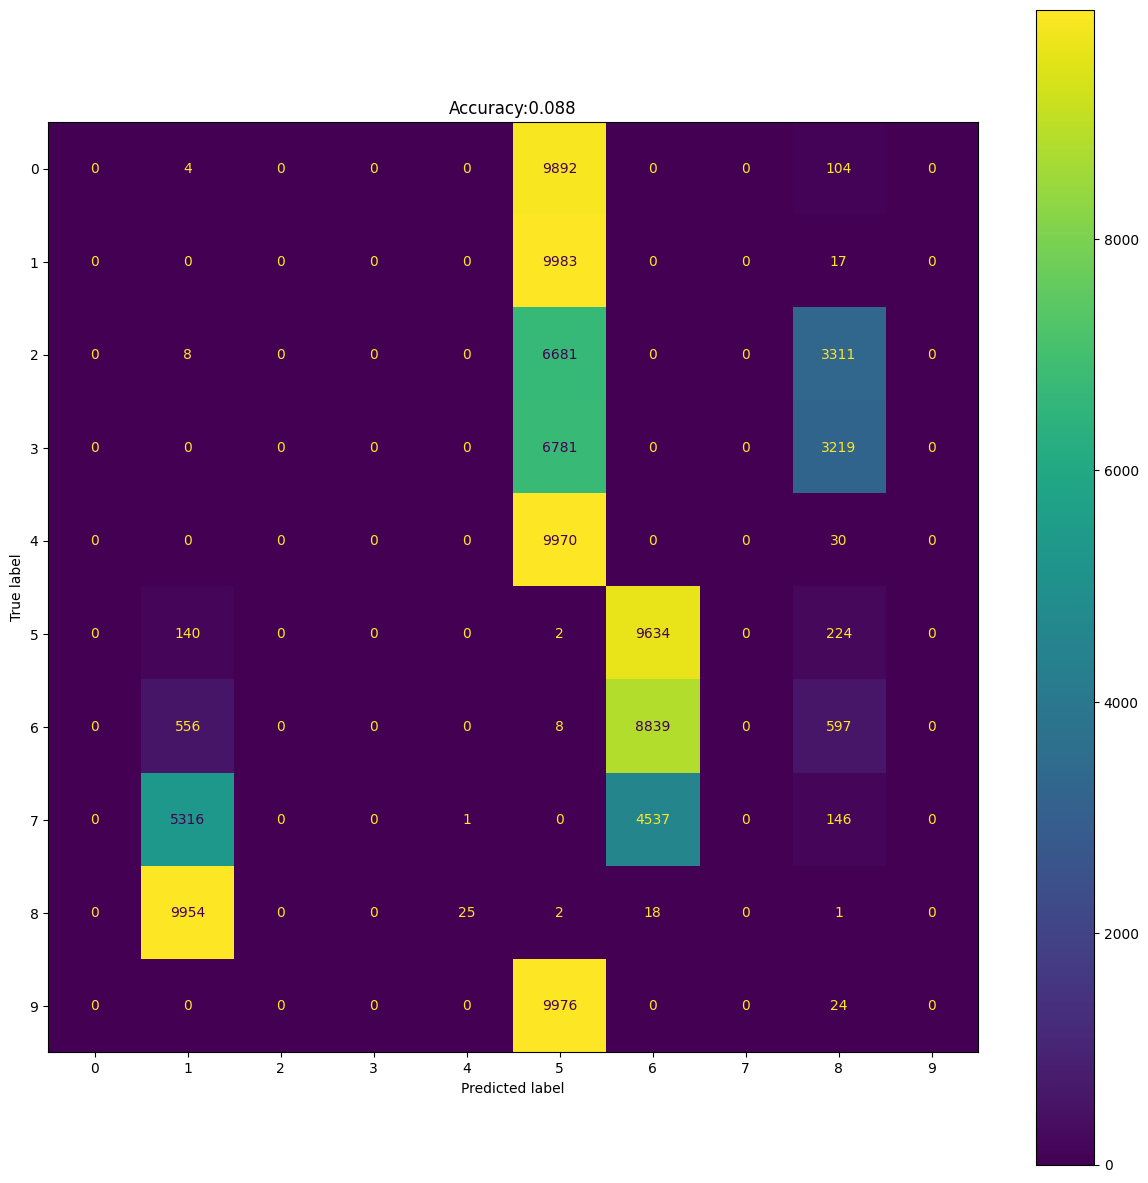

In [37]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [38]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [39]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.7958 - accuracy: 0.4432
Epoch 2/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.9240 - accuracy: 0.6249
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8292 - accuracy: 0.6617
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7782 - accuracy: 0.6822
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7450 - accuracy: 0.6924
Epoch 6/30
3125/3125 [==============================] - 14s 4ms/step - loss: 0.7181 - accuracy: 0.7070
Epoch 7/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.7011 - accuracy: 0.7119
Epoch 8/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6847 - accuracy: 0.7190
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.6708 - accuracy: 0.7223
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

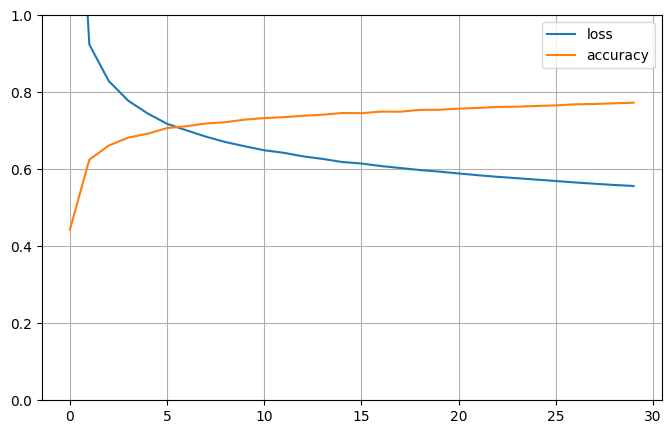

In [40]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [41]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5581 - accuracy: 0.7625
test loss, test acc: [0.5580633878707886, 0.7624899744987488]


In [42]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[9147  766    0    4   25    0    0    0    0   58]
 [2262 7148    2    5  345    0    0    0    0  238]
 [  10    1 9364   71  523    0    0    0    0   31]
 [   2    1 7841 1059  995    0    0    0    0  102]
 [  63  326  457  179 7654    0    0    0    0 1321]
 [   0    0    6    0    1 9437  207  346    3    0]
 [  24    2    8    0    0  111 9628  227    0    0]
 [   0    0    0    0    0  577  944 8322  157    0]
 [  25    0    1    0    2   21    2  104 9845    0]
 [ 380  617  140  123 4095    0    0    0    0 4645]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83     10000
           1       0.81      0.71      0.76     10000
           2       0.53      0.94      0.67     10000
           3       0.73      0.11      0.19     10000
           4       0.56      0.77      0.65     10000
           5       0.93      0.94      0.94     10000
           6       0.89      0.9

Test Accuracy:0.76249


Text(0.5, 1.0, 'Accuracy:0.762')

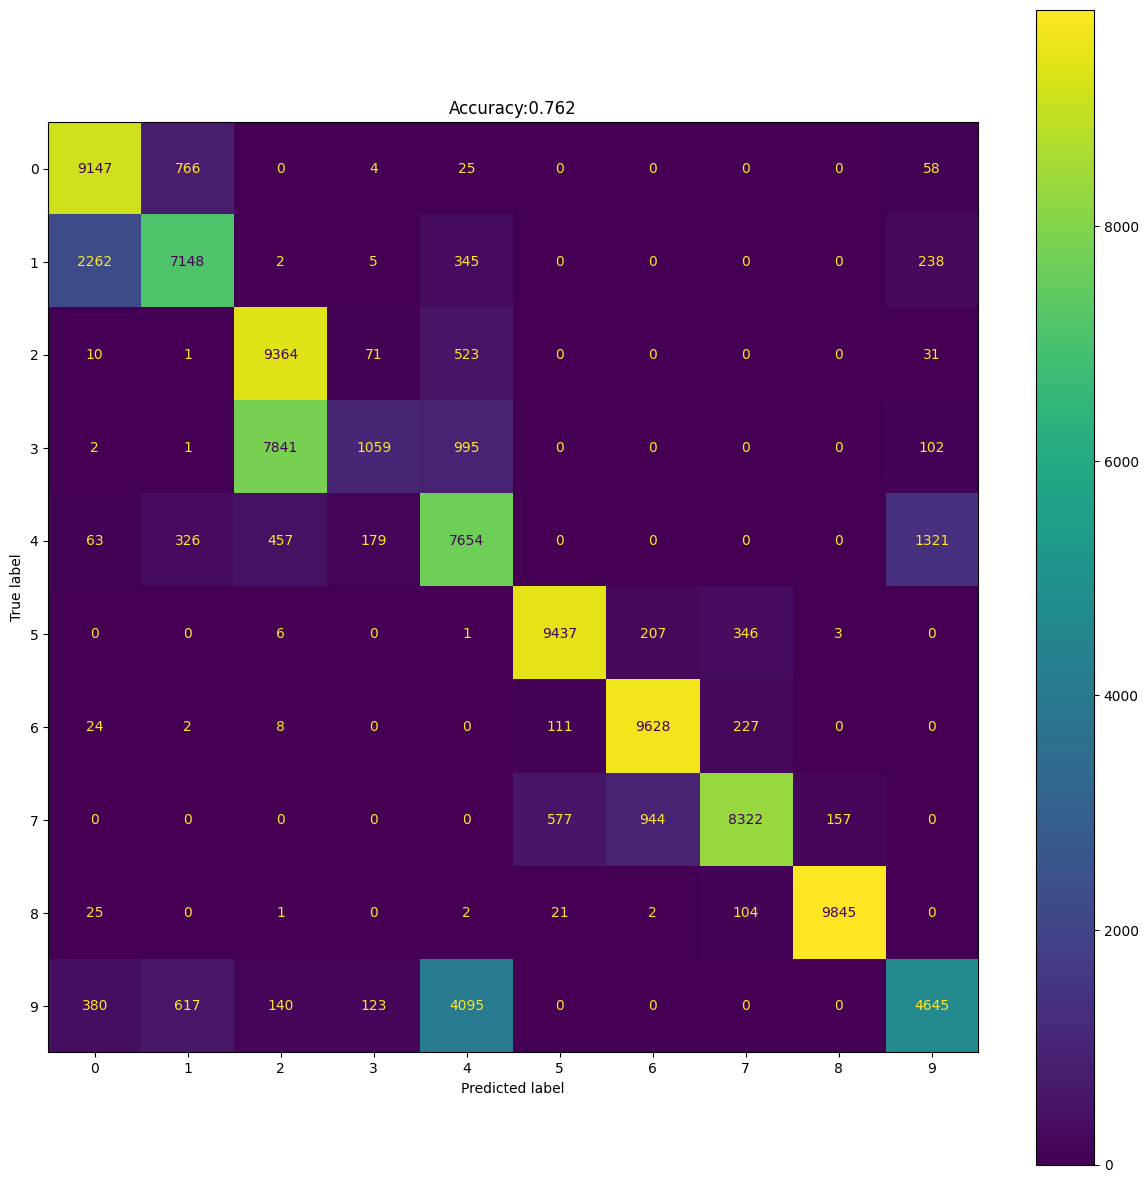

In [43]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data1 model

Cross-model Validation without training

In [44]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data1_model.h5")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [45]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 18.5200 - accuracy: 0.1002
test loss, test acc: [18.51995086669922, 0.1002499982714653]


In [46]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 13s 4ms/step
[[10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [10000     0     0     0     0     0     0     0     0     0]
 [ 9975     0     0     0     0    25     0     0     0     0]
 [ 9997     0     0     0     0     3     0     0     0     0]
 [ 9991     0     0     0     0     9     0     0     0     0]
 [ 9317     4     0     2     0   670     5     2     0     0]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.10      1.00      0.18     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0

Test Accuracy:0.10025


Text(0.5, 1.0, 'Accuracy:0.100')

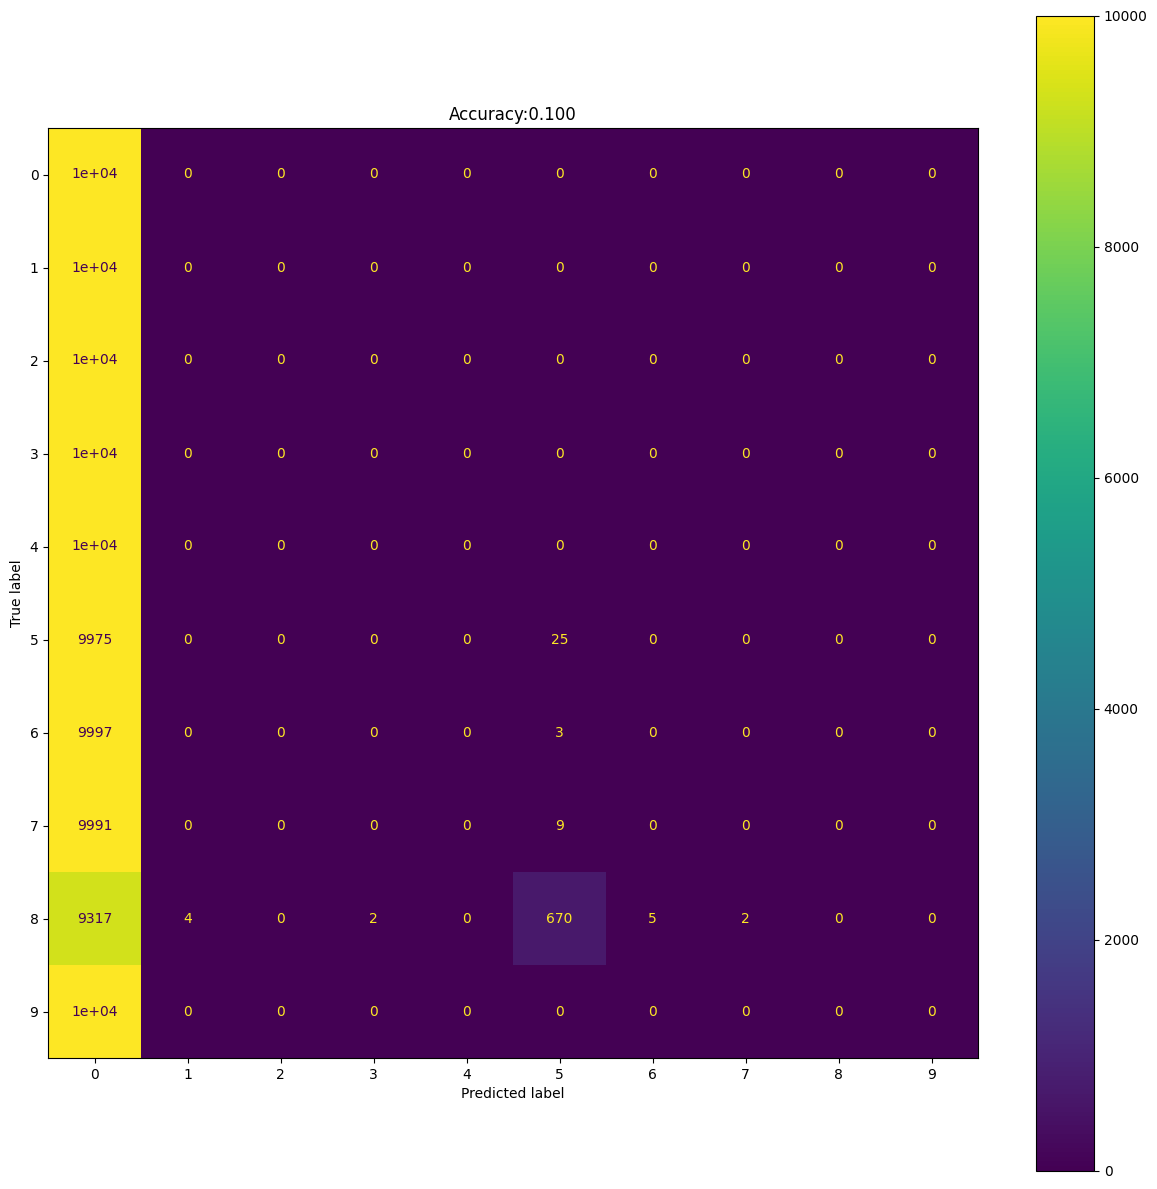

In [47]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [48]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1400)              2868600   
                                                                 
 dense_25 (Dense)            (None, 800)               1120800   
                                                                 
 dense_26 (Dense)            (None, 500)               400500    
                                                                 
 dense_27 (Dense)            (None, 200)               100200    
                                                                 
 dense_28 (Dense)            (None, 100)               20100     
                                                                 
 dense_29 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [49]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 2.2015 - accuracy: 0.2991
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.4688 - accuracy: 0.4781
Epoch 3/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.3107 - accuracy: 0.5399
Epoch 4/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.2236 - accuracy: 0.5784
Epoch 5/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.1642 - accuracy: 0.6047
Epoch 6/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.1186 - accuracy: 0.6228
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0829 - accuracy: 0.6370
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0530 - accuracy: 0.6453
Epoch 9/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0278 - accuracy: 0.6533
Epoch 10/30
3125/3125 [==============================] - 14s 5ms/step - l

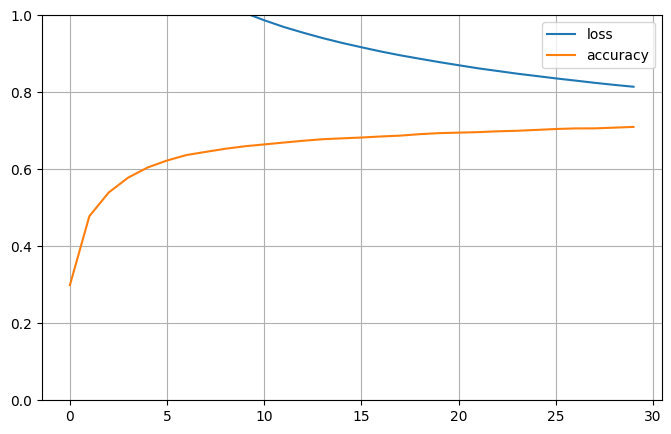

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [51]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.8135 - accuracy: 0.7086
test loss, test acc: [0.8134508728981018, 0.7086399793624878]


In [52]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[7908 1700   63   90   63    0    2    0    0  174]
 [ 832 8454  130  201  172    0   22    1    0  188]
 [ 147  905 3732 3583 1006   25  312   71    0  219]
 [ 152  653 1231 6125 1237   13   92   43    0  454]
 [ 112  584  291 1650 4658   23   60    1    0 2621]
 [   0    0   18  152   37 8294 1038  296  112   53]
 [  15    7   37   61    9  596 8816  406   37   16]
 [   0    0    5   79    0  339  424 8364  789    0]
 [   6    4    0    3    1  251  133  815 8770   17]
 [ 117  332   80  748 2941   10   29    0    0 5743]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82     10000
           1       0.67      0.85      0.75     10000
           2       0.67      0.37      0.48     10000
           3       0.48      0.61      0.54     10000
           4       0.46      0.47      0.46     10000
           5       0.87      0.83      0.85     10000
           6       0.81      0.8

Test Accuracy:0.70864


Text(0.5, 1.0, 'Accuracy:0.709')

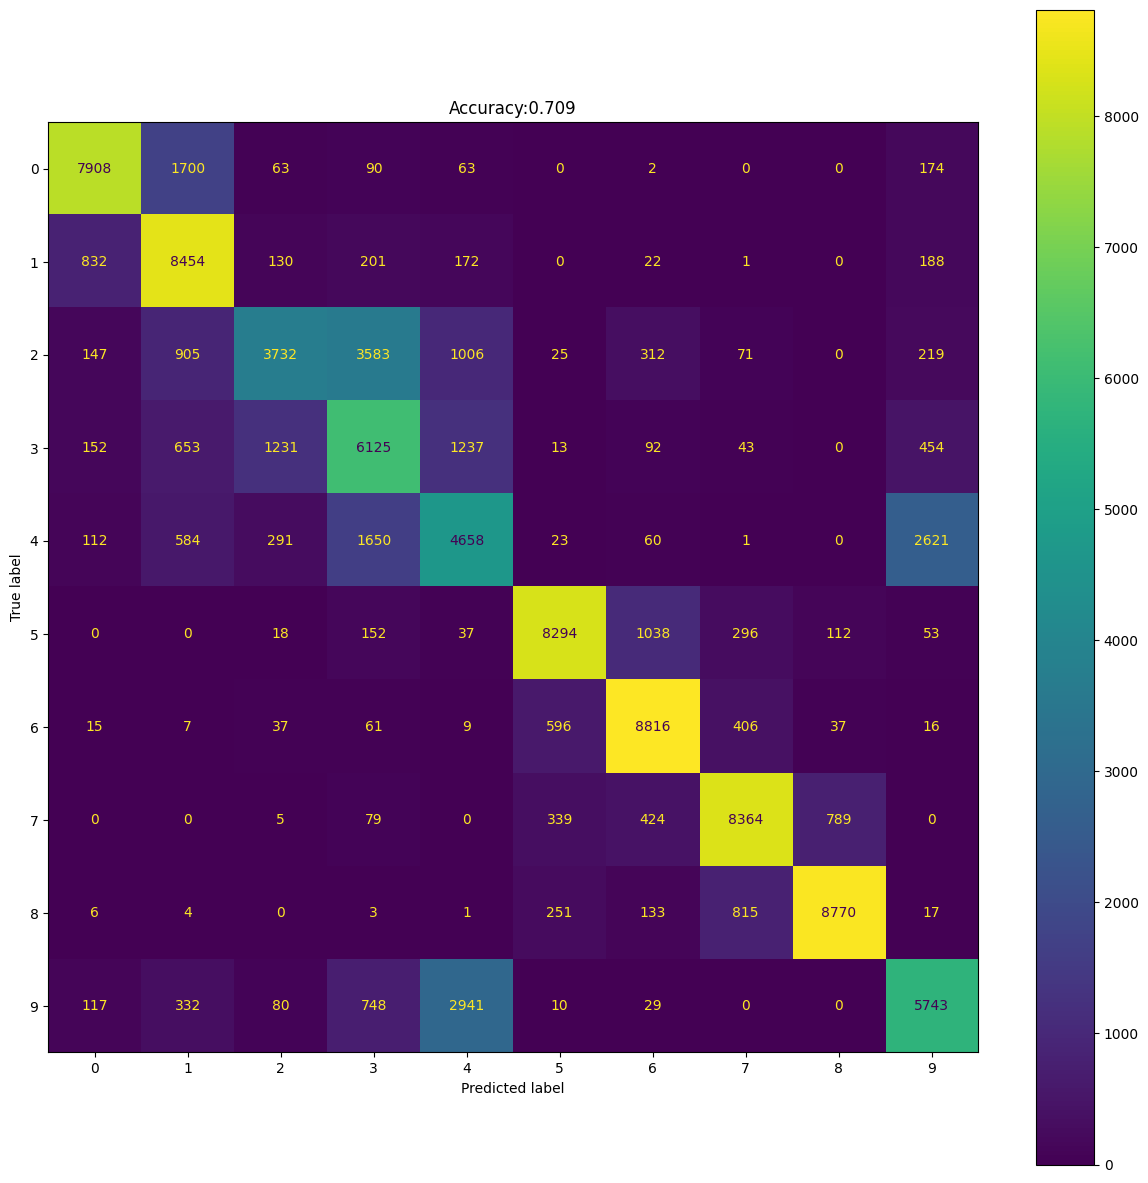

In [53]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_I_data2 model

Cross-model Validation without training

In [54]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_I_data2_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-

In [55]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 15s 5ms/step - loss: 15.4221 - accuracy: 0.0989
test loss, test acc: [15.42210578918457, 0.09892000257968903]


In [56]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[9717    0    0    0    0  281    0    0    2    0]
 [9954    0    0    0    0   46    0    0    0    0]
 [9969    0    0    0    0   31    0    0    0    0]
 [9983    0    0    0    0   17    0    0    0    0]
 [9861    0    0    0    0  139    0    0    0    0]
 [9697    0    0  122    0  164    0    0   17    0]
 [9872    0    0    2    0  125    0    0    1    0]
 [9927    0    0    0    0   67    0    0    6    0]
 [9905   10    0   43   15   16    0    0   11    0]
 [9915    0    0    0    0   85    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.10      0.97      0.18     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.17      0.02      0.03     10000
           6       0.00      0.0

Test Accuracy:0.09892


Text(0.5, 1.0, 'Accuracy:0.099')

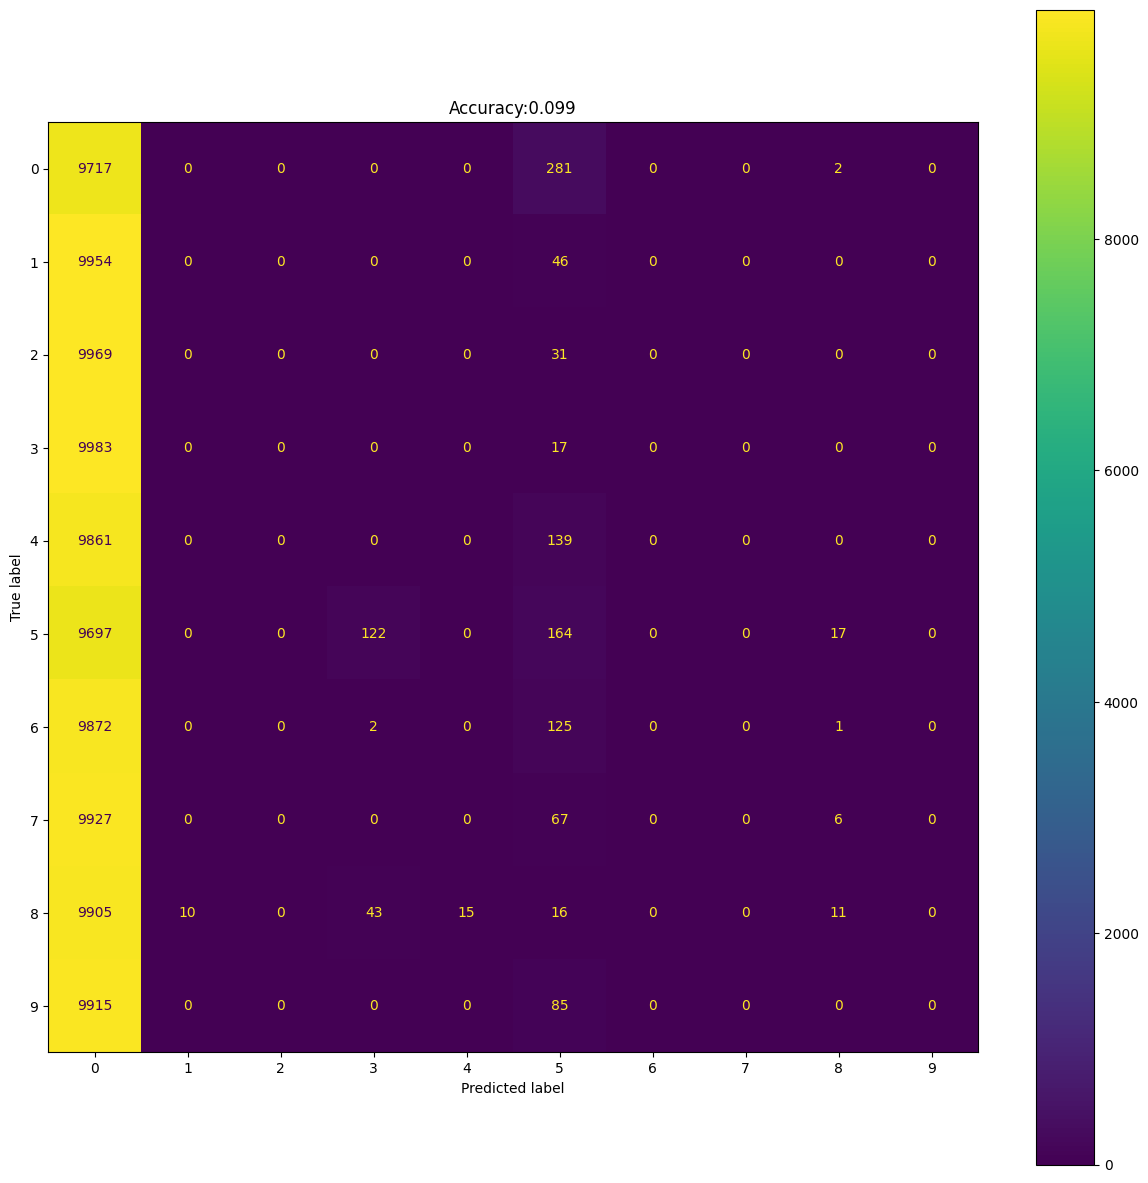

In [57]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [58]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-trai

In [59]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 16s 5ms/step - loss: 2.5943 - accuracy: 0.2051
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.4704 - accuracy: 0.4435
Epoch 3/30
3125/3125 [==============================] - 12s 4ms/step - loss: 1.2511 - accuracy: 0.5418
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 1.1540 - accuracy: 0.5790
Epoch 5/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0955 - accuracy: 0.5993
Epoch 6/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.0546 - accuracy: 0.6134
Epoch 7/30
3125/3125 [==============================] - 14s 5ms/step - loss: 1.0244 - accuracy: 0.6225
Epoch 8/30
3125/3125 [==============================] - 14s 4ms/step - loss: 1.0001 - accuracy: 0.6300
Epoch 9/30
3125/3125 [==============================] - 12s 4ms/step - loss: 0.9805 - accuracy: 0.6352
Epoch 10/30
3125/3125 [==============================] - 13s 4ms/step - l

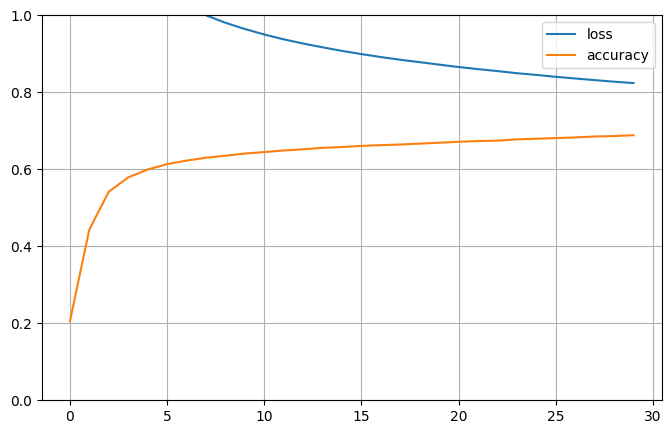

In [60]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [61]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.8221 - accuracy: 0.6916
test loss, test acc: [0.8221145272254944, 0.6916099786758423]


In [62]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[8418 1363   25    0  154    0    0    0    0   40]
 [ 629 8466  258  122  235    0    0    0    0  290]
 [ 160  793 6020 1462  845   16   55   12    0  637]
 [  56  874 2897 3871  869    6  148   21    0 1258]
 [ 240  866 1290  669 3758    1   23    1    0 3152]
 [   0    0   68    4    0 8622  913  178  213    2]
 [  19    5   83   29    6  970 7732  995  148   13]
 [   0    0    2    0    0  121  895 8487  495    0]
 [  25    0    2    0    0  369  182  555 8867    0]
 [ 163  856 1080  879 2065    2   35    0    0 4920]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85     10000
           1       0.64      0.85      0.73     10000
           2       0.51      0.60      0.55     10000
           3       0.55      0.39      0.45     10000
           4       0.47      0.38      0.42     10000
           5       0.85      0.86      0.86     10000
           6       0.77      0.7

Test Accuracy:0.69161


Text(0.5, 1.0, 'Accuracy:0.692')

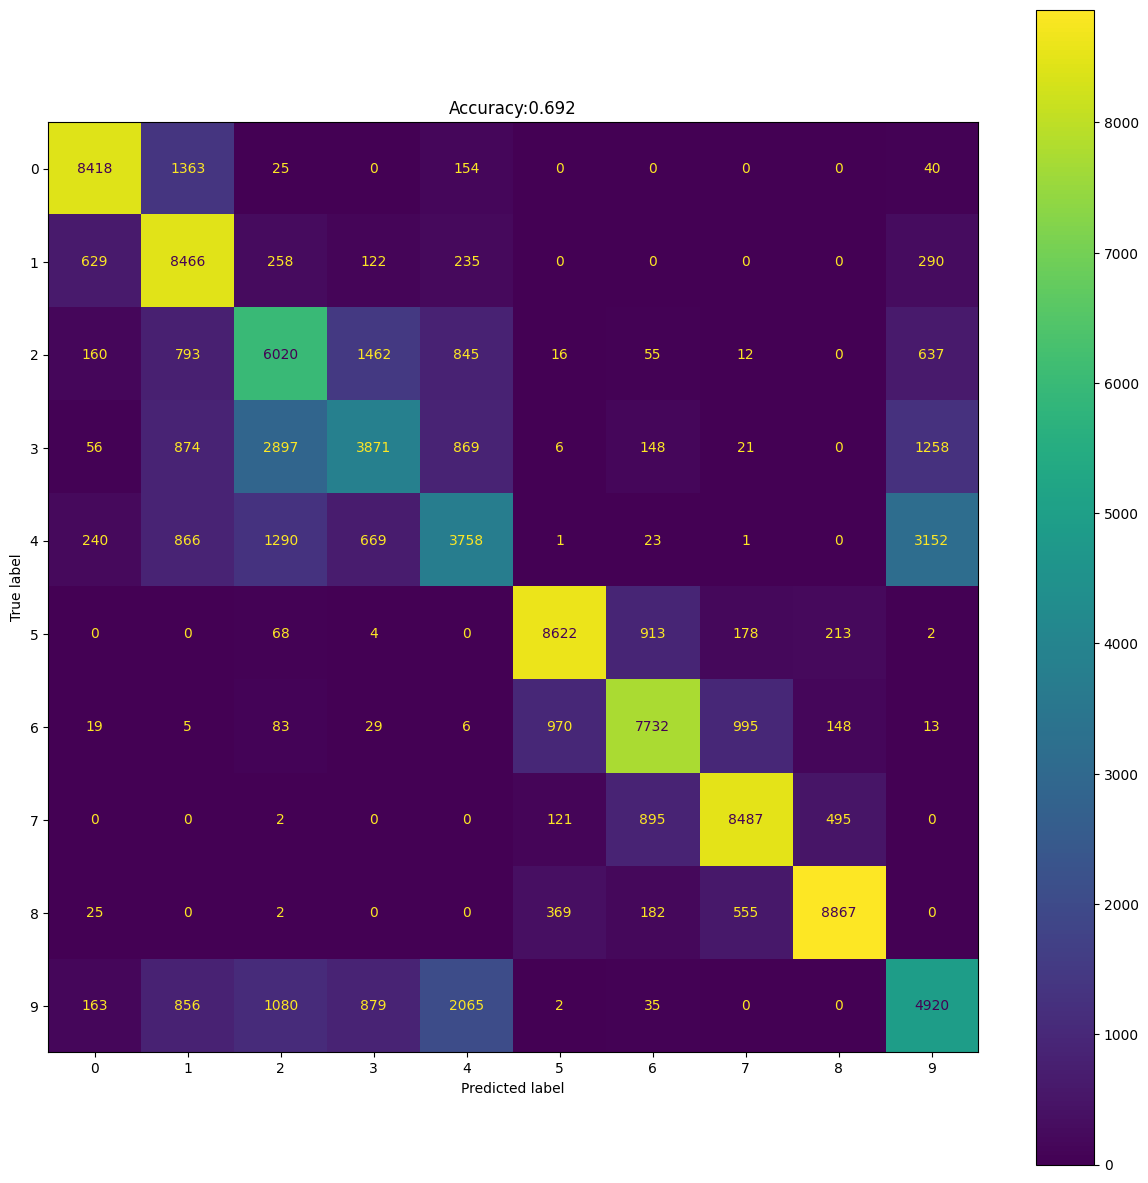

In [63]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## iPhone13_II model

In [64]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_own_models/iPHONE13_II_model.h5")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
No

In [65]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 16s 5ms/step - loss: 12.1558 - accuracy: 0.1139
test loss, test acc: [12.155774116516113, 0.11387000232934952]


In [66]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 14s 4ms/step
[[1266    0    0    0 8734    0    0    0    0    0]
 [ 674    0    0    0 9326    0    0    0    0    0]
 [   9    0    0    0 9991    0    0    0    0    0]
 [   1    0    0    0 9999    0    0    0    0    0]
 [   4    0    0    0 9996    0    0    0    0    0]
 [   2   28    0    0 8579    0    0    0    2 1389]
 [  25    5    0    0 9847    0    0    0   77   46]
 [   0 1458    0    0 8451    0    0    0   86    5]
 [  23 8033    0    0 1136    0    0    1  125  682]
 [  11    0    0    0 9989    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.63      0.13      0.21     10000
           1       0.00      0.00      0.00     10000
           2       0.00      0.00      0.00     10000
           3       0.00      0.00      0.00     10000
           4       0.12      1.00      0.21     10000
           5       0.00      0.00      0.00     10000
           6       0.00      0.0

Test Accuracy:0.11387


Text(0.5, 1.0, 'Accuracy:0.114')

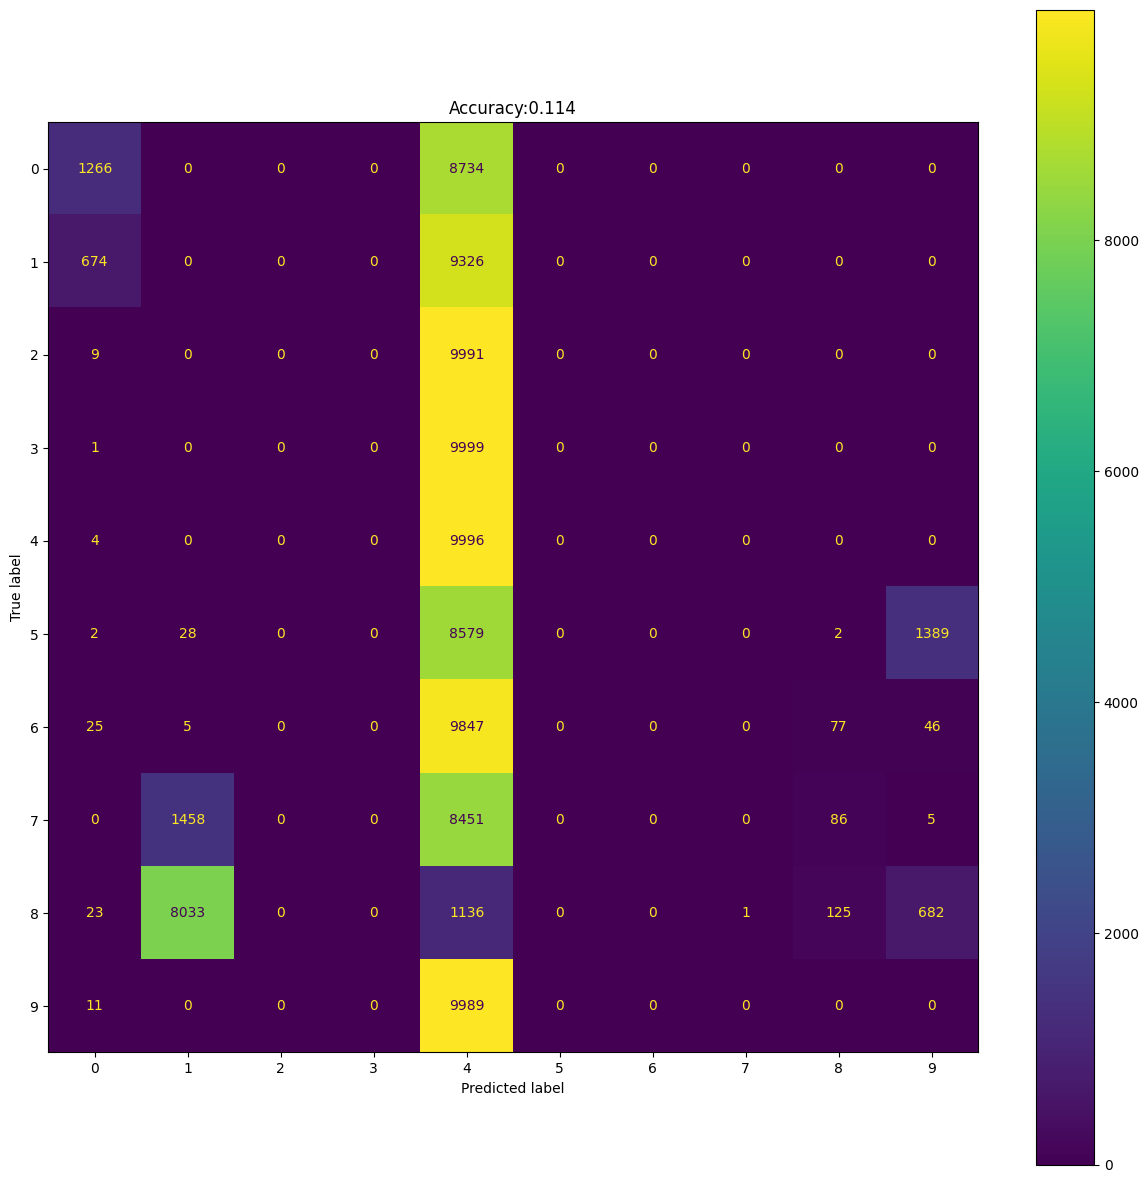

In [67]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

Cross-model Validation by applying Transfer Learning

In [68]:
# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1400)              2868600   
                                                                 
 dense_7 (Dense)             (None, 800)               1120800   
                                                                 
 dense_8 (Dense)             (None, 500)               400500    
                                                                 
 dense_9 (Dense)             (None, 200)               100200    
                                                                 
 dense_10 (Dense)            (None, 100)               20100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 1,010
Non-tr

In [69]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

history = model.fit(X, Y, epochs=30)

Epoch 1/30
3125/3125 [==============================] - 17s 5ms/step - loss: 1.8256 - accuracy: 0.3976
Epoch 2/30
3125/3125 [==============================] - 15s 5ms/step - loss: 1.0730 - accuracy: 0.6261
Epoch 3/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.9415 - accuracy: 0.6689
Epoch 4/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8708 - accuracy: 0.6889
Epoch 5/30
3125/3125 [==============================] - 13s 4ms/step - loss: 0.8236 - accuracy: 0.7023
Epoch 6/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7883 - accuracy: 0.7120
Epoch 7/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7603 - accuracy: 0.7223
Epoch 8/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7378 - accuracy: 0.7275
Epoch 9/30
3125/3125 [==============================] - 15s 5ms/step - loss: 0.7190 - accuracy: 0.7342
Epoch 10/30
3125/3125 [==============================] - 15s 5ms/step - l

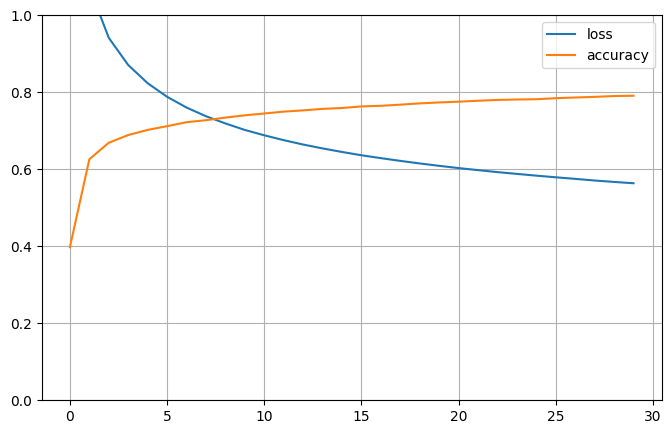

In [70]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [71]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.5673 - accuracy: 0.7784
test loss, test acc: [0.5673028826713562, 0.7784000039100647]


In [73]:
y_pred = np.argmax(model.predict(X), axis=-1)

print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

3125/3125 [==============================] - 16s 5ms/step
[[8952  976    4    6   31    0    0    0    0   31]
 [ 842 9060    0    2    5    0    0    0    0   91]
 [  14   16 2435 6938  433   42   15    1    0  106]
 [   5   20  431 8776  495   47   17    3    0  206]
 [  46  141   35 1220 4589    6    2    0    0 3961]
 [   0    0    1  104    1 9296  372  126   97    3]
 [  26    1    2   33    0  620 8928  325   65    0]
 [   0    0    1    8    0  212  212 8924  643    0]
 [  25    0    0    3    0  178   14  618 9162    0]
 [  52  190   21  649 1356    4   10    0    0 7718]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     10000
           1       0.87      0.91      0.89     10000
           2       0.83      0.24      0.38     10000
           3       0.49      0.88      0.63     10000
           4       0.66      0.46      0.54     10000
           5       0.89      0.93      0.91     10000
           6       0.93      0.8

Test Accuracy:0.7784


Text(0.5, 1.0, 'Accuracy:0.778')

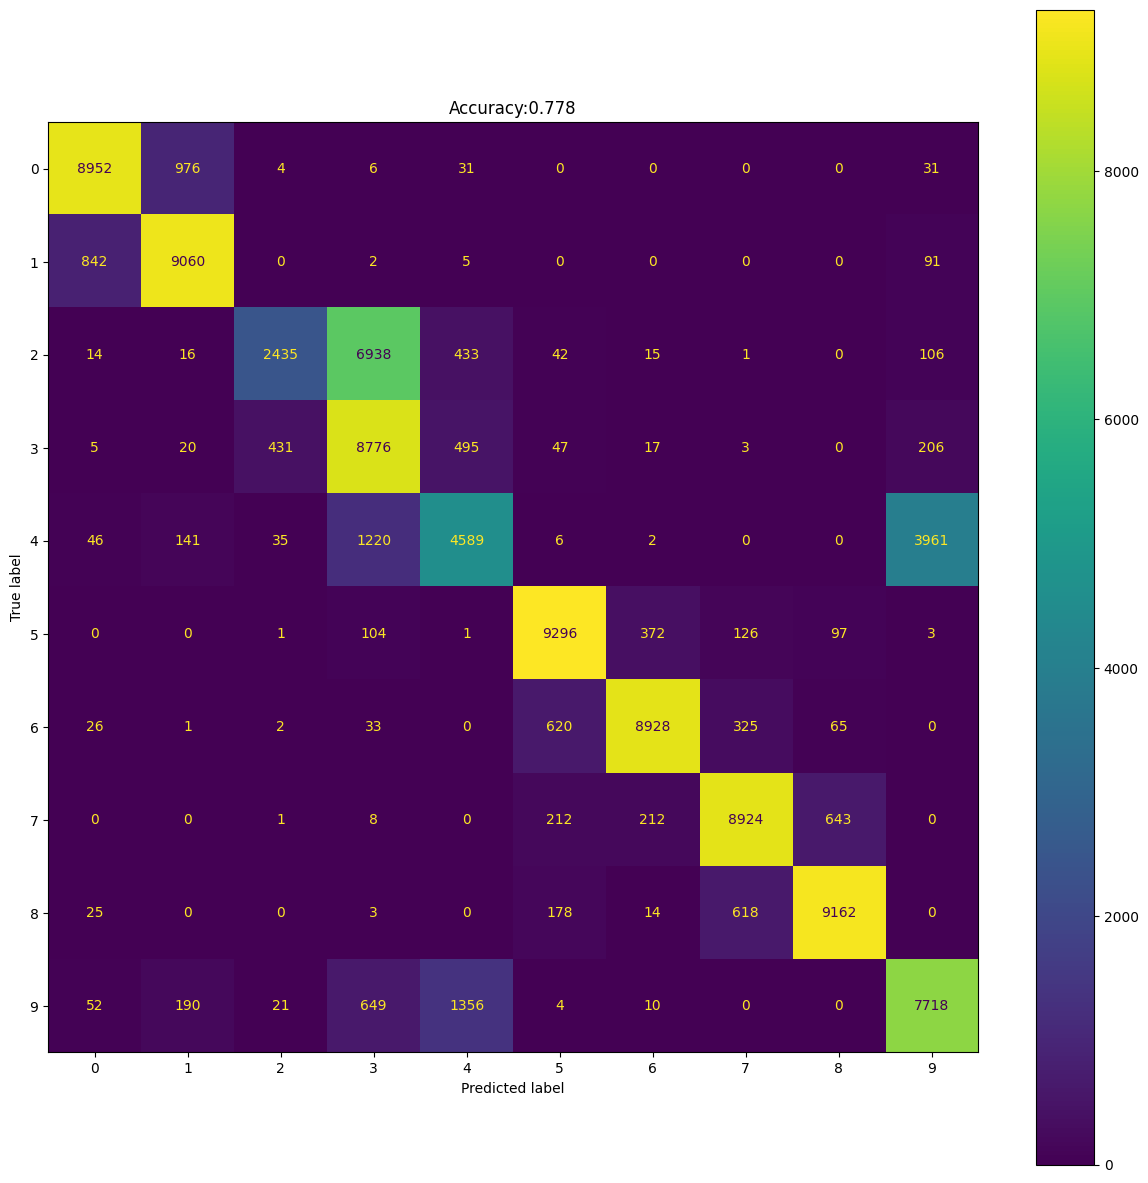

In [74]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')